In [4]:
import pickle
import numpy as np
import itertools

darray=[]

filestr = '../../dropout_results/negative_80percent.pkl'

f = pickle.load(open(filestr,'rb'))

for loop in range(len(f)):
    A = np.dstack((f[loop][0],f[loop][1],f[loop][2],f[loop][3],f[loop][4],f[loop][5],f[loop][6],f[loop][7],f[loop][8],f[loop][9]))
    var = np.std(A, axis=2)
    darray.append(np.ravel(var[0]))
list_flat_negative = list(itertools.chain(*darray))    

darray=[]
pred_train_label=[]

filestr = '../../dropout_results/train_80percent.pkl'
f = pickle.load(open(filestr,'rb'))

for loop in range(len(f)):
    A = np.dstack((f[loop][0],f[loop][1],f[loop][2],f[loop][3],f[loop][4],f[loop][5],f[loop][6],f[loop][7],f[loop][8],f[loop][9]))
    var = np.std(A, axis=2)
    mean_train = np.mean(A, axis=2)
    darray.append(np.ravel(var[0]))
    pred_train_label.append(np.argmax(mean_train))
list_flat_train = list(itertools.chain(*darray))

darray=[]
pred_test_label=[]

filestr = '../../dropout_results/test_80percent.pkl'
f = pickle.load(open(filestr,'rb'))

for loop in range(len(f)):
    A = np.dstack((f[loop][0],f[loop][1],f[loop][2],f[loop][3],f[loop][4],f[loop][5],f[loop][6],f[loop][7],f[loop][8],f[loop][9]))
    var = np.std(A, axis=2)
    mean_test = np.mean(A, axis=2)
    darray.append(np.ravel(var[0]))
    pred_test_label.append(np.argmax(mean_test))

list_flat_test = list(itertools.chain(*darray))


Text(0.5, 0, 'Standard Deviation of 10 random predictions at 90 percent dropout after 30 epochs')

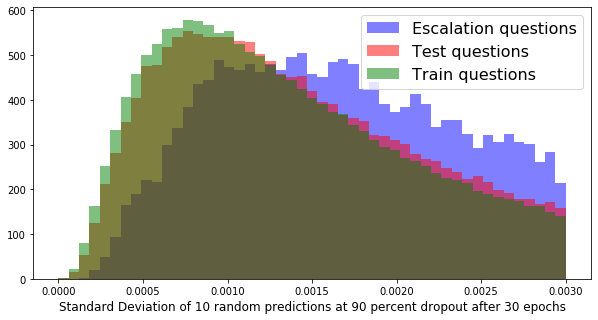

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]
nbins = 50
bins = np.linspace(0, 0.003, nbins)
weights = np.ones_like(list_flat_negative)/float(len(list_flat_negative))
plt.hist(list_flat_negative, alpha=0.5, color = "blue", bins=bins, density=True)

weights = np.ones_like(list_flat_test)/float(len(list_flat_test))
plt.hist(list_flat_test, alpha=0.5, color = "red", bins=bins, density=True)

weights = np.ones_like(list_flat_train)/float(len(list_flat_train))
plt.hist(list_flat_train, alpha=0.5, bins=bins, color = "green", density=True)

plt.legend(['Escalation questions', 'Test questions', 'Train questions'], fontsize=16)
# nbins = 40
# bins = np.linspace(0, np.max(entropy_negative), nbins)
# weights = np.ones_like(entropy_negative)/float(len(entropy_negative))
# plt.hist(entropy_negative, weights=weights, alpha=0.5, bins=bins)
plt.xlabel('Standard Deviation of 10 random predictions at 90 percent dropout after 30 epochs', fontsize=12)
# plt.xticks(rotation=0, fontsize=16)
# plt.yticks(rotation=0, fontsize=16)
# plt.legend(['Escalation questions', 'Test questions', 'Negative questions'], fontsize=20)
#plt.savefig('entropyHistEscalationVSNormalVSNegative.png')

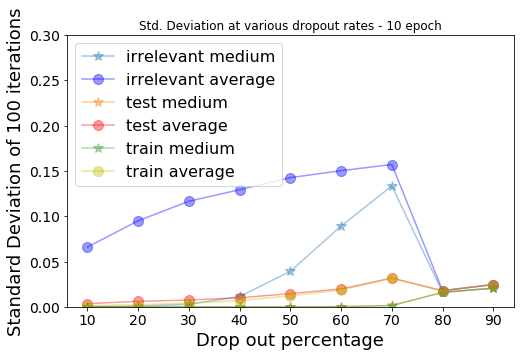

In [41]:
import pickle
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5


# load all dropout data 

v_90_train = pickle.load(open('/mnt/ava_data/dropout/90percent_train.pkl','rb'))
v_90_test = pickle.load(open('/mnt/ava_data/dropout/90percent_test.pkl','rb'))
v_90_negative = pickle.load(open('/mnt/ava_data/dropout/90percent_negative.pkl','rb'))

v_80_train = pickle.load(open('/mnt/ava_data/dropout/80percent_train.pkl','rb'))
v_80_test = pickle.load(open('/mnt/ava_data/dropout/80percent_test.pkl','rb'))
v_80_negative = pickle.load(open('/mnt/ava_data/dropout/80percent_negative.pkl','rb'))

v_70_train = pickle.load(open('/mnt/ava_data/dropout/70percent_train.pkl','rb'))
v_70_test = pickle.load(open('/mnt/ava_data/dropout/70percent_test.pkl','rb'))
v_70_negative = pickle.load(open('/mnt/ava_data/dropout/70percent_negative.pkl','rb'))

v_60_train = pickle.load(open('/mnt/ava_data/dropout/60percent_train.pkl','rb'))
v_60_test = pickle.load(open('/mnt/ava_data/dropout/60percent_test.pkl','rb'))
v_60_negative = pickle.load(open('/mnt/ava_data/dropout/60percent_negative.pkl','rb'))

v_50_train = pickle.load(open('/mnt/ava_data/dropout/50percent_train.pkl','rb'))
v_50_test = pickle.load(open('/mnt/ava_data/dropout/50percent_test.pkl','rb'))
v_50_negative = pickle.load(open('/mnt/ava_data/dropout/50percent_negative.pkl','rb'))

v_40_train = pickle.load(open('/mnt/ava_data/dropout/40percent_train.pkl','rb'))
v_40_test = pickle.load(open('/mnt/ava_data/dropout/40percent_test.pkl','rb'))
v_40_negative = pickle.load(open('/mnt/ava_data/dropout/40percent_negative.pkl','rb'))

v_30_train = pickle.load(open('/mnt/ava_data/dropout/30percent_train.pkl','rb'))
v_30_test = pickle.load(open('/mnt/ava_data/dropout/30percent_test.pkl','rb'))
v_30_negative = pickle.load(open('/mnt/ava_data/dropout/30percent_negative.pkl','rb'))

v_20_train = pickle.load(open('/mnt/ava_data/dropout/20percent_train.pkl','rb'))
v_20_test = pickle.load(open('/mnt/ava_data/dropout/20percent_test.pkl','rb'))
v_20_negative = pickle.load(open('/mnt/ava_data/dropout/20percent_negative.pkl','rb'))

v_10_train = pickle.load(open('/mnt/ava_data/dropout/10percent_train.pkl','rb'))
v_10_test = pickle.load(open('/mnt/ava_data/dropout/10percent_test.pkl','rb'))
v_10_negative = pickle.load(open('/mnt/ava_data/dropout/10percent_negative.pkl','rb'))



m_train_10 = np.ravel(np.std(v_10_train,1))
std_train_max_10 =np.quantile(m_train_10, 0.9, axis=0)  
std_train_min_10 =np.quantile(m_train_10, 0.1, axis=0)   
std_train_mean_10 =np.quantile(m_train_10, 0.5, axis=0)  

m_test_10 = np.ravel(np.std(v_10_test,1))
std_test_max_10 =np.quantile(m_test_10, 0.9, axis=0)  
std_test_min_10 =np.quantile(m_test_10, 0.1, axis=0)  
std_test_mean_10=np.quantile(m_test_10, 0.5, axis=0)  

m_negative_10 = np.ravel(np.std(v_10_negative,1))
std_negative_max_10 = np.quantile(m_negative_10, 0.9, axis=0)  
std_negative_min_10 = np.quantile(m_negative_10, 0.1, axis=0)  
std_negative_mean_10 = np.quantile(m_negative_10, 0.5, axis=0)  


std_train_average_10 = np.mean(m_train_10)
std_test_average_10 = np.mean(m_test_10)
std_negative_average_10 = np.mean(m_negative_10)


m_train_20 = np.ravel(np.std(v_20_train,1))
std_train_max_20 =np.quantile(m_train_20, 0.9, axis=0)  
std_train_min_20 =np.quantile(m_train_20, 0.1, axis=0)   
std_train_mean_20 =np.quantile(m_train_20, 0.5, axis=0)  


m_test_20 = np.ravel(np.std(v_20_test,1))
std_test_max_20 =np.quantile(m_test_20, 0.9, axis=0)  
std_test_min_20 =np.quantile(m_test_20, 0.1, axis=0)   
std_test_mean_20 =np.quantile(m_test_20, 0.5, axis=0)  


m_negative_20 = np.ravel(np.std(v_20_negative,1))
std_negative_max_20 = np.quantile(m_negative_20, 0.9, axis=0)  
std_negative_min_20 = np.quantile(m_negative_20, 0.1, axis=0)  
std_negative_mean_20 = np.quantile(m_negative_20, 0.5, axis=0)  


std_train_average_20 = np.mean(m_train_20)
std_test_average_20 = np.mean(m_test_20)
std_negative_average_20 = np.mean(m_negative_20)


m_train_30 = np.ravel(np.std(v_30_train,1))
std_train_max_30 = np.quantile(m_train_30,0.9, axis=0)
std_train_min_30 = np.quantile(m_train_30,0.1, axis=0) 
std_train_mean_30 = np.quantile(m_train_30,0.5, axis=0)

m_test_30 = np.ravel(np.std(v_30_test,1))
std_test_max_30 = np.quantile(m_test_30,0.9, axis=0) 
std_test_min_30 = np.quantile(m_test_30,0.1, axis=0) 
std_test_mean_30 = np.quantile(m_test_30,0.5, axis=0)  

m_negative_30 = np.ravel(np.std(v_30_negative,1))
std_negative_max_30 = np.quantile(m_negative_30,0.9, axis=0)  
std_negative_min_30 = np.quantile(m_negative_30,0.1, axis=0)  
std_negative_mean_30 = np.quantile(m_negative_30,0.5, axis=0)  

std_train_average_30 = np.mean(m_train_30)
std_test_average_30 = np.mean(m_test_30)
std_negative_average_30 = np.mean(m_negative_30)

m_train_40 = np.ravel(np.std(v_40_train,1))
std_train_max_40 = np.quantile(m_train_40,0.9, axis=0)
std_train_min_40 = np.quantile(m_train_40,0.1, axis=0) 
std_train_mean_40 = np.quantile(m_train_40,0.5, axis=0)

m_test_40 = np.ravel(np.std(v_40_test,1))
std_test_max_40 = np.quantile(m_test_40,0.9, axis=0) 
std_test_min_40 = np.quantile(m_test_40,0.1, axis=0) 
std_test_mean_40 = np.quantile(m_test_40,0.5, axis=0)  

m_negative_40 = np.ravel(np.std(v_40_negative,1))
std_negative_max_40 = np.quantile(m_negative_40,0.9, axis=0)  
std_negative_min_40 = np.quantile(m_negative_40,0.1, axis=0)  
std_negative_mean_40 = np.quantile(m_negative_40,0.5, axis=0)  

std_train_average_40 = np.mean(m_train_40)
std_test_average_40 = np.mean(m_test_40)
std_negative_average_40 = np.mean(m_negative_40)


m_train_50 = np.ravel(np.std(v_50_train,1))
std_train_max_50 = np.quantile(m_train_50,0.9, axis=0)
std_train_min_50 = np.quantile(m_train_50,0.1, axis=0) 
std_train_mean_50 = np.quantile(m_train_50,0.5, axis=0)

m_test_50 = np.ravel(np.std(v_50_test,1))
std_test_max_50 = np.quantile(m_test_50, 0.9, axis=0) 
std_test_min_50 = np.quantile(m_test_50, 0.1, axis=0) 
std_test_mean_50 = np.quantile(m_test_50, 0.5, axis=0)  



m_negative_50 = np.ravel(np.std(v_50_negative,1))
std_negative_max_50 = np.quantile(m_negative_50,0.9, axis=0)  
std_negative_min_50 = np.quantile(m_negative_50,0.1, axis=0)  
std_negative_mean_50 = np.quantile(m_negative_50,0.5, axis=0)  


std_train_average_50 = np.mean(m_train_50)
std_test_average_50 = np.mean(m_test_50)
std_negative_average_50 = np.mean(m_negative_50)


m_train_50 = np.ravel(np.std(v_50_train,1))
std_train_max_50 = np.quantile(m_train_50,0.9, axis=0)
std_train_min_50 = np.quantile(m_train_50,0.1, axis=0) 
std_train_mean_50 = np.quantile(m_train_50,0.5, axis=0)

m_test_50 = np.ravel(np.std(v_50_test,1))
std_test_max_50 = np.quantile(m_test_50, 0.9, axis=0) 
std_test_min_50 = np.quantile(m_test_50, 0.1, axis=0) 
std_test_mean_50 = np.quantile(m_test_50, 0.5, axis=0)  

m_negative_50 = np.ravel(np.std(v_50_negative,1))
std_negative_max_50 = np.quantile(m_negative_50,0.9, axis=0)  
std_negative_min_50 = np.quantile(m_negative_50,0.1, axis=0)  
std_negative_mean_50 = np.quantile(m_negative_50,0.5, axis=0)  


std_train_average_50 = np.mean(m_train_50)
std_test_average_50 = np.mean(m_test_50)
std_negative_average_50 = np.mean(m_negative_50)

m_train_60 = np.ravel(np.std(v_60_train,1))
std_train_max_60 = np.quantile(m_train_60,0.9, axis=0)
std_train_min_60 = np.quantile(m_train_60,0.1, axis=0) 
std_train_mean_60 = np.quantile(m_train_60,0.5, axis=0)

m_test_60 = np.ravel(np.std(v_60_test,1))
std_test_max_60 = np.quantile(m_test_60, 0.9, axis=0) 
std_test_min_60 = np.quantile(m_test_60, 0.1, axis=0) 
std_test_mean_60 = np.quantile(m_test_60, 0.5, axis=0)  

m_negative_60 = np.ravel(np.std(v_60_negative,1))
std_negative_max_60 = np.quantile(m_negative_60,0.9, axis=0)  
std_negative_min_60 = np.quantile(m_negative_60,0.1, axis=0)  
std_negative_mean_60 = np.quantile(m_negative_60,0.5, axis=0)  

std_train_average_60 = np.mean(m_train_60)
std_test_average_60 = np.mean(m_test_60)
std_negative_average_60 = np.mean(m_negative_60)

m_train_70 = np.ravel(np.std(v_70_train,1))
std_train_max_70 = np.quantile(m_train_70,0.9, axis=0)
std_train_min_70 = np.quantile(m_train_70,0.1, axis=0) 
std_train_mean_70 = np.quantile(m_train_70,0.5, axis=0)

m_test_70 = np.ravel(np.std(v_70_test,1))
std_test_max_70 = np.quantile(m_test_70, 0.9, axis=0) 
std_test_min_70 = np.quantile(m_test_70, 0.1, axis=0) 
std_test_mean_70 = np.quantile(m_test_70, 0.5, axis=0)  

m_negative_70 = np.ravel(np.std(v_70_negative,1))
std_negative_max_70 = np.quantile(m_negative_70,0.9, axis=0)  
std_negative_min_70 = np.quantile(m_negative_70,0.1, axis=0)  
std_negative_mean_70 = np.quantile(m_negative_70,0.5, axis=0)  

std_train_average_70 = np.mean(m_train_70)
std_test_average_70 = np.mean(m_test_70)
std_negative_average_70 = np.mean(m_negative_70)

m_train_80 = np.ravel(np.std(v_80_train,1))
std_train_max_80 = np.quantile(m_train_80,0.9, axis=0)
std_train_min_80 = np.quantile(m_train_80,0.1, axis=0) 
std_train_mean_80 = np.quantile(m_train_80,0.5, axis=0)

m_test_80 = np.ravel(np.std(v_80_test,1))
std_test_max_80 = np.quantile(m_test_80, 0.9, axis=0) 
std_test_min_80 = np.quantile(m_test_80, 0.1, axis=0) 
std_test_mean_80 = np.quantile(m_test_80, 0.5, axis=0)  

m_negative_80 = np.ravel(np.std(v_80_negative,1))
std_negative_max_80 = np.quantile(m_negative_80,0.9, axis=0)  
std_negative_min_80 = np.quantile(m_negative_80,0.1, axis=0)  
std_negative_mean_80 = np.quantile(m_negative_80,0.5, axis=0)  

std_train_average_80 = np.mean(m_train_80)
std_test_average_80 = np.mean(m_test_80)
std_negative_average_80 = np.mean(m_negative_80)


m_train_90 = np.ravel(np.std(v_90_train,1))
std_train_max_90 = np.quantile(m_train_90,0.9, axis=0)
std_train_min_90 = np.quantile(m_train_90,0.1, axis=0) 
std_train_mean_90 = np.quantile(m_train_90,0.5, axis=0)

m_test_90 = np.ravel(np.std(v_90_test,1))
std_test_max_90 = np.quantile(m_test_90, 0.9, axis=0) 
std_test_min_90 = np.quantile(m_test_90, 0.1, axis=0) 
std_test_mean_90 = np.quantile(m_test_90, 0.5, axis=0)  

m_negative_90 = np.ravel(np.std(v_90_negative,1))
std_negative_max_90 = np.quantile(m_negative_90,0.9, axis=0)  
std_negative_min_90 = np.quantile(m_negative_90,0.1, axis=0)  
std_negative_mean_90 = np.quantile(m_negative_90,0.5, axis=0)  

std_train_average_90 = np.mean(m_train_90)
std_test_average_90 = np.mean(m_test_90)
std_negative_average_90 = np.mean(m_negative_90)


plt.plot([1,2,3,4,5,6,7,8,9], [std_negative_mean_10,std_negative_mean_20,std_negative_mean_30,std_negative_mean_40, std_negative_mean_50, std_negative_mean_60, std_negative_mean_70, std_negative_mean_80, std_negative_mean_90], '*-', alpha=0.4, markersize=10,  label=r'irrelevant medium')
plt.plot([1,2,3,4,5,6,7,8,9], [std_negative_average_10,std_negative_average_20,std_negative_average_30,std_negative_average_40, std_negative_average_50, std_negative_average_60, std_negative_average_70, std_negative_average_80, std_negative_average_90], 'b-o', alpha=0.4, markersize=10, label=r'irrelevant average')
plt.plot([1,2,3,4,5,6,7,8,9], [std_test_mean_10,std_test_mean_20,std_test_mean_30,std_test_mean_40, std_test_mean_50, std_test_mean_60, std_test_mean_70, std_test_mean_80, std_test_mean_90], '*-', alpha=0.4, markersize=10, label=r'test medium')
plt.plot([1,2,3,4,5,6,7,8,9], [std_test_average_10,std_test_average_20,std_test_average_30,std_test_average_40, std_test_average_50, std_test_average_60, std_test_average_70, std_test_average_80, std_test_average_90], 'r-o', alpha=0.4, markersize=10, label=r'test average')
plt.plot([1,2,3,4,5,6,7,8,9], [std_train_mean_10,std_train_mean_20,std_train_mean_30,std_train_mean_40, std_train_mean_50, std_train_mean_60, std_train_mean_70, std_train_mean_80, std_train_mean_90], '*-', alpha=0.4, markersize=10,   label=r'train medium')
plt.plot([1,2,3,4,5,6,7,8,9], [std_train_average_10,std_train_average_20,std_train_average_30,std_train_average_40, std_train_average_50, std_train_average_60, std_train_average_70, std_train_average_80, std_train_average_90], 'y-o', alpha=0.4, markersize=10, label=r'train average')


plt.gca().legend(loc='upper left', ncol=1, fontsize=16) 


positions = (1, 2, 3, 4, 5, 6, 7, 8, 9)
labels = ("10", "20", "30", "40", "50", "60", "70", "80", "90")


plt.xlabel('Drop out percentage', fontsize=18)
plt.xticks(positions, labels, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,0.3)
plt.ylabel('Standard Deviation of 100 iterations', fontsize=18)
    
plt.title('Std. Deviation at various dropout rates - 10 epoch')
plt.savefig('acc_dropout_10epoch', dpi=600)
#plt.show()